In [2]:
# 从amos数据中提去有效列
import pandas as pd
import os
dir = "./amos/"
date = ["AMOS20191216/", "AMOS20200313/"]

dateN = date[0]
dateN = date[1]

file = os.listdir(dir + dateN)
data1 = pd.read_csv(dir + dateN + file[0], sep='\t')
data2 = pd.read_csv(dir + dateN + file[1], sep='\t')
data3 = pd.read_csv(dir + dateN + file[2], sep='\t')
print(data1.shape, data2.shape, data3.shape)
data =  pd.merge(data1, data2, on=['CREATEDATE'], how='inner')
data.shape
data = pd.merge(data, data3, on=['CREATEDATE'], how='inner')
data.shape
data.columns

useful = ['CREATEDATE', 'LOCALDATE (BEIJING)', 'PAINS (HPA)', 'QFE R06 (HPA)', 'QFE R24 (HPA)',
          'QNH AERODROME (HPA)', 'TEMP (°C)', 'RH (%)', 'DEWPOINT (°C)', 'LIGHTS', 'WS2A (MPS)',
          'WD2A', 'CW2A (MPS)','RVR_1A', 'RVR_10A', 'RVR1M', 'RVR_10M', 'MOR_1A', 'MOR_10A',
          'MOR_10M', 'MOR_10X',
         ]
#3 - -8
data = data[useful]
data.to_csv('./goodData/amos' + dateN[-9:-1] + '.csv', index=False)
# data2.info

(1440, 17) (5755, 26) (5755, 30)


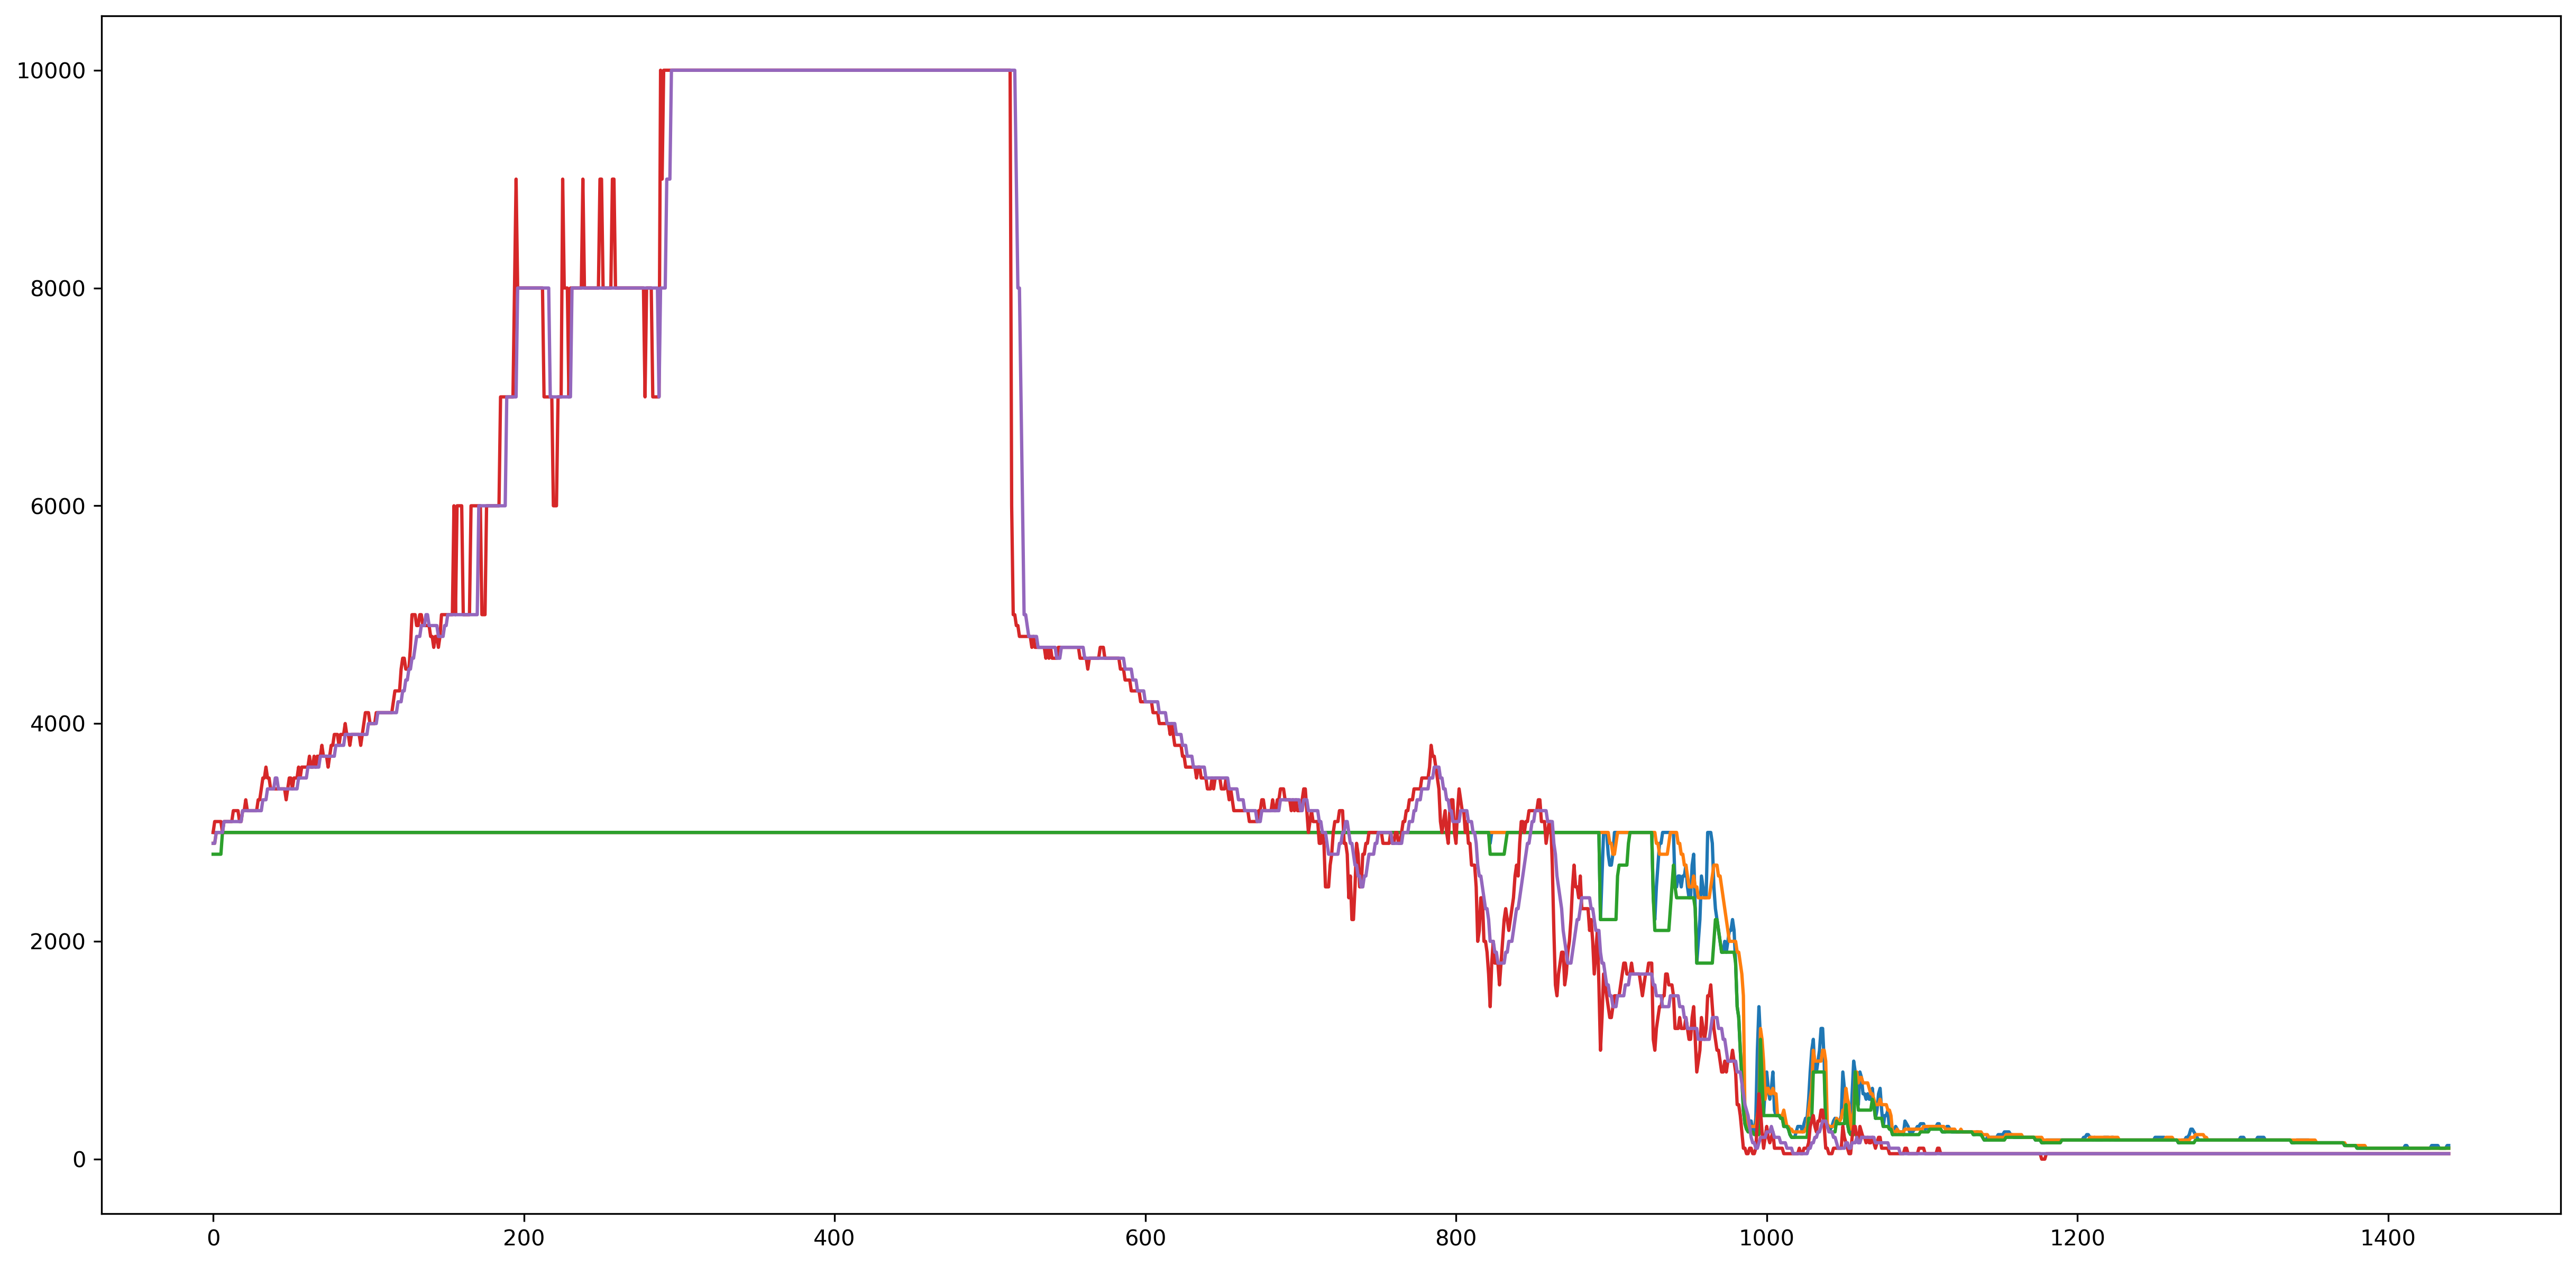

In [41]:
import matplotlib.pyplot as plt
rvr1a = data['RVR_1A'].to_list()
rvr10a = data['RVR_10A'].to_list()

mor1a = data['MOR_1A'].to_list()
mor10a = data['MOR_10A'].to_list()

plt.figure(figsize=(20,10), dpi=300)

plt.plot(rvr1a)
plt.plot(rvr10a)
plt.plot(rvr1m)

plt.plot(mor1a)
plt.plot(mor10a)

plt.show()


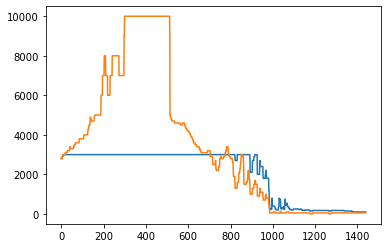

In [42]:
rvr10m = data['RVR_10M'].to_list()
mor10m = data['MOR_10M'].to_list()

plt.plot(rvr10m)
plt.plot(mor10m)



In [45]:
def plotfig(rvr, mor, da):
    plt.plot(rvr10m)
    plt.plot(mor10m)
    plt.plot(da)
    plt.show()
    

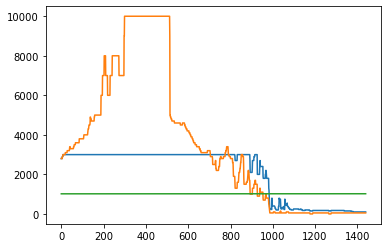

In [46]:
plotfig(rvr1a, mor1a, data['QFE R06 (HPA)'])

QFE R06 (HPA)


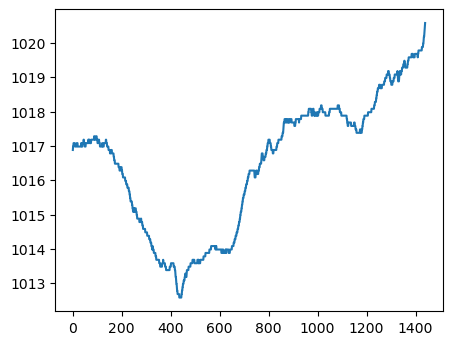

QFE R24 (HPA)


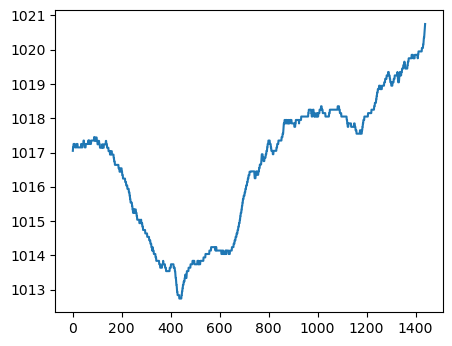

QNH AERODROME (HPA)


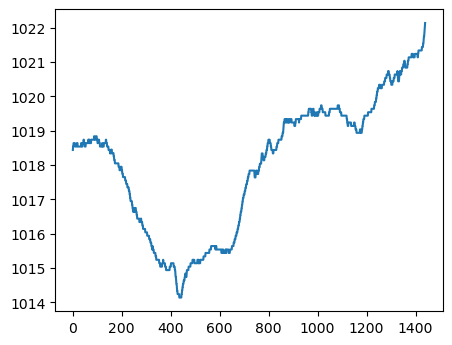

TEMP (°C)


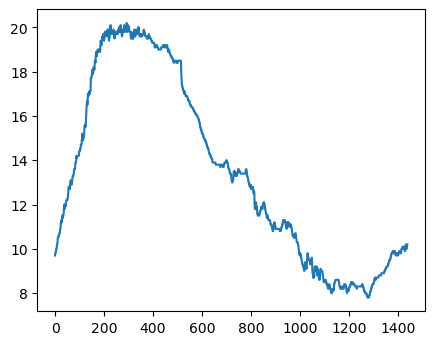

RH (%)


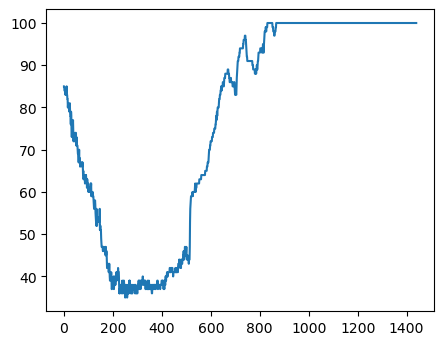

DEWPOINT (°C)


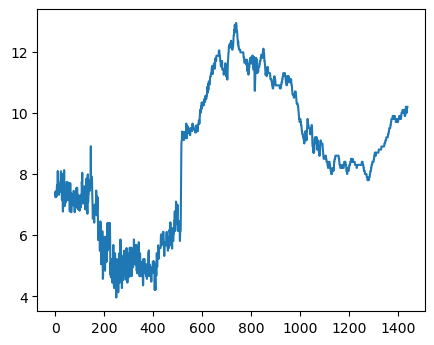

LIGHTS


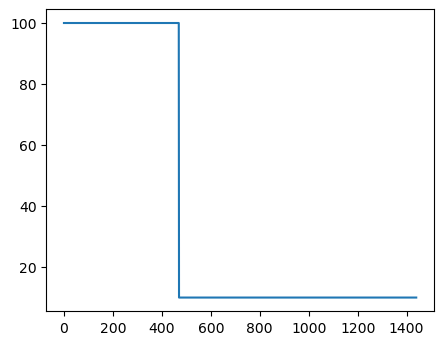

WS2A (MPS)


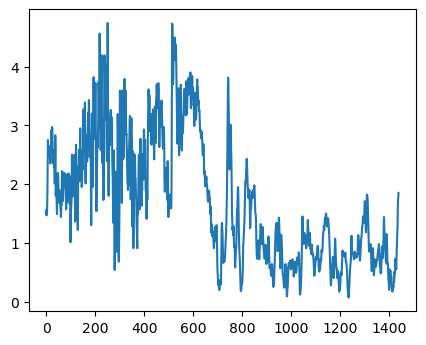

WD2A


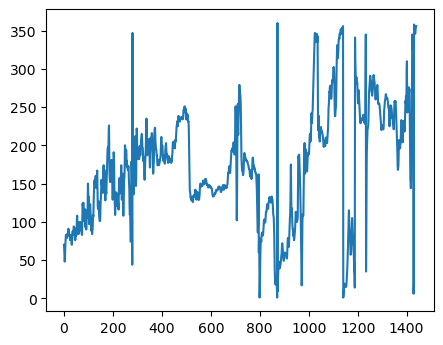

CW2A (MPS)


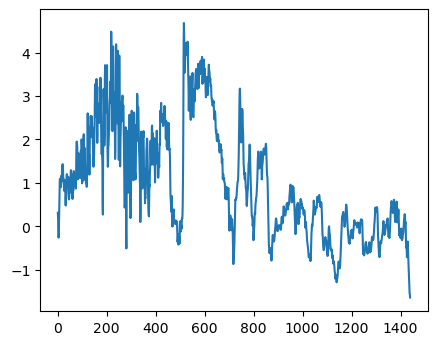

In [51]:
feature = useful[3:-8]
for feat in feature:
    print(feat)
    plt.figure(figsize=(5, 4), dpi=100)
    plt.plot(data[feat])
    plt.show()

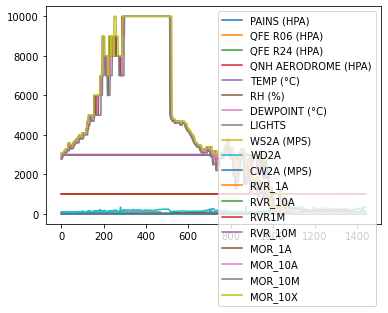

In [52]:
data.plot()

In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.core.frame import DataFrame
import os
from pandas.plotting import scatter_matrix
import random
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

data = pd.read_excel('./goodData/313stata.xlsx', 'Sheet1')

# data.head(10)
# data.shape
mean = data.mean()
std = data.std()
range_low = mean-3*std
range_high = mean+3*std
new_data = data
num=0
'''以3*detal准则为依据删除异常值'''
for i in range(40):  #行
    for j in range(344):  #属性
        if range_low[j] > data.iloc[i,j] or data.iloc[i,j] > range_high[j]:
            print('i',i)
            new_data = new_data.drop([i], axis=0)
            num = num+1
            print('num:',num)
            break
data = new_data
data.to_excel('./qinxidata.xlsx', sheet_name='Sheet0',index=False)


i 0
num: 1
i 3
num: 2
i 4
num: 3
i 5
num: 4
i 7
num: 5
i 9
num: 6
i 10
num: 7
i 11
num: 8
i 12
num: 9
i 13
num: 10
i 15
num: 11
i 17
num: 12
i 20
num: 13
i 21
num: 14
i 23
num: 15
i 24
num: 16
i 25
num: 17
i 26
num: 18
i 27
num: 19
i 28
num: 20
i 31
num: 21
i 32
num: 22
i 34
num: 23
i 36
num: 24
i 37
num: 25
i 38
num: 26


In [54]:
pd.read_excel?